# week6

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [7]:
# Segment-wise summary
summary_table = df.groupby(
    ['Age_Group', 'Gender', 'Urban_or_Rural', 'Primary_Device'],
    observed=False
)['Avg_Daily_Screen_Time_hr'].agg(['count', 'mean', 'median', 'max', 'min']).reset_index()

# Rename columns for clarity
summary_table.rename(columns={
    'count': 'User_Count',
    'mean': 'Avg_Screen_Time',
    'median': 'Median_Screen_Time',
    'max': 'Max_Screen_Time',
    'min': 'Min_Screen_Time'
}, inplace=True)

# Display table
summary_table

,Age_Group,Gender,Urban_or_Rural,Primary_Device,User_Count,Avg_Screen_Time,Median_Screen_Time,Max_Screen_Time,Min_Screen_Time
0,Pre-Teens (7-12),Female,Rural,Laptop,68,4.311176,4.310,7.15,1.57
1,Pre-Teens (7-12),Female,Rural,Smartphone,268,4.246604,4.320,11.26,0.00
2,Pre-Teens (7-12),Female,Rural,TV,203,3.970099,4.140,11.25,0.00
3,Pre-Teens (7-12),Female,Rural,Tablet,104,4.224135,4.270,9.88,0.00
4,Pre-Teens (7-12),Female,Urban,Laptop,140,4.475929,4.490,7.62,0.32
5,Pre-Teens (7-12),Female,Urban,Smartphone,678,4.044779,4.165,13.89,0.00
6,Pre-Teens (7-12),Female,Urban,TV,475,4.116442,4.260,11.02,0.00
7,Pre-Teens (7-12),Female,Urban,Tablet,235,3.927915,3.940,12.09,0.00
8,Pre-Teens (7-12),Male,Rural,Laptop,48,4.424375,4.390,6.80,2.12
9,Pre-Teens (7-12),Male,Rural,Smartphone,270,4.202667,4.240,11.00,0.00


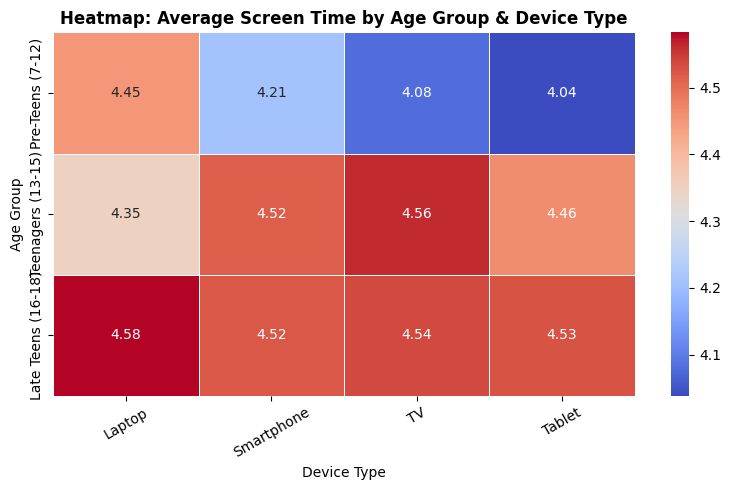

In [8]:
# Group data by Age_Group and Primary_Device with
cohort = df.groupby(
    ['Age_Group', 'Primary_Device'],
    observed=False
)['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Pivot for heatmap
cohort_pivot = cohort.pivot(index='Age_Group', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

# Maintain correct age order
age_order = ["Pre-Teens (7-12)", "Teenagers (13-15)", "Late Teens (16-18)"]
cohort_pivot = cohort_pivot.reindex(age_order)

# Plot Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(cohort_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Average Screen Time by Age Group & Device Type", fontsize=12, weight='bold')
plt.xlabel("Device Type", fontsize=10)
plt.ylabel("Age Group", fontsize=10)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [9]:
# Gender-wise summary statistics
gender_summary = df.groupby('Gender', observed=False)[
    'Avg_Daily_Screen_Time_hr'
].mean().reset_index()

gender_summary.rename(columns={
    'Avg_Daily_Screen_Time_hr': 'Avg Screen Time (hrs)',
}, inplace=True)

print(gender_summary)

   Gender  Avg Screen Time (hrs)
0  Female               4.327021
1    Male               4.377754


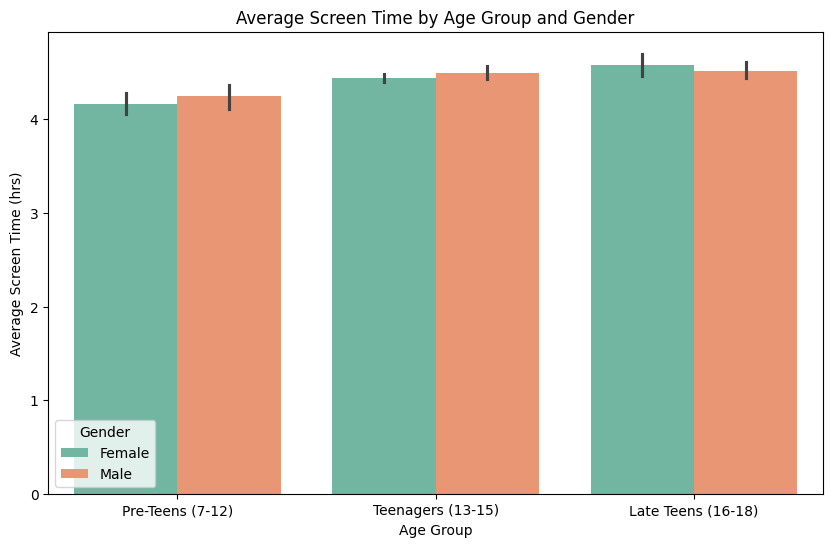

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=summary_table, x='Age_Group', y='Avg_Screen_Time', hue='Gender', palette='Set2')
plt.title('Average Screen Time by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Screen Time (hrs)')
plt.legend(title='Gender')
plt.show()


Screen time gradually increases from 7 to 18 years, showing growing device dependence.

The sharpest rise appears between 13–16 years

Ages 7–10 have the lowest screen time

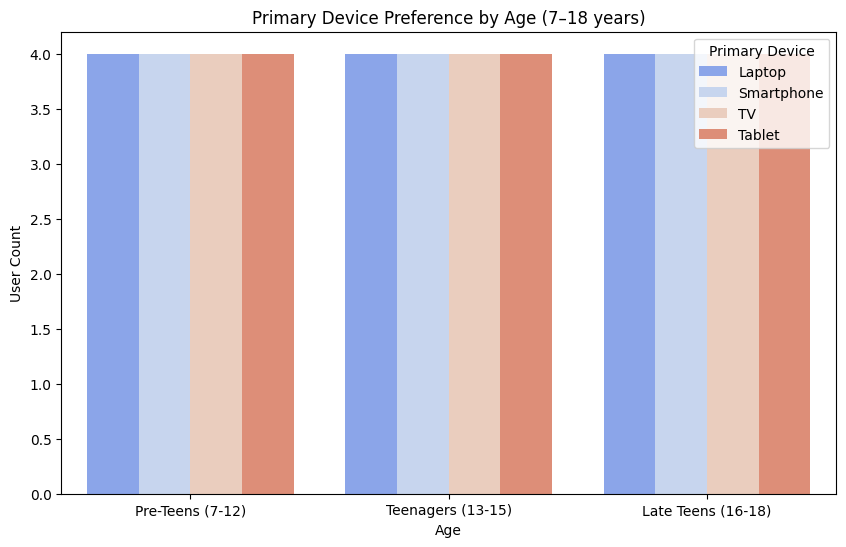

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=summary_table, x='Age_Group', hue='Primary_Device', palette='coolwarm')
plt.title('Primary Device Preference by Age (7–18 years)')
plt.xlabel('Age')
plt.ylabel('User Count')
plt.legend(title='Primary Device')
plt.show()


Tablets and TVs dominate among 7–10-year-olds due to shared family use.

Smartphones take over rapidly after age 13, showing early independence.

Laptops become popular around 15–18, often for study-related use.